## Exploratory Data Analysis - Anti Microbial Peptides

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

Allow multiple outputs from each cell.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load in all data

In [20]:
df_full = pd.read_csv("../data/amp/all_data.csv")
print(f"Full dataset shape: {df_full.shape}")
df_full.head()

Full dataset shape: (4042, 3)


,PDBs_code,SequenceID,label
0,AP02484,GMASKAGSVLGKITKIALGAL,1
1,AP02630,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,1
2,AP01427,GAIKDALKGAAKTVAVELLKKAQCKLEKTC,1
3,AP02983,FFGRLKAVFRGARQGWKEHRY,1
4,AP01815,DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFIMG,1


Split into train and test datasets.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_full[["PDBs_code", "SequenceID"]], \
    df_full["label"], test_size=0.2, random_state=42, stratify=df_full["label"])

df_train = X_train.copy()
df_train["label"] = y_train

df_test = X_test.copy()
df_test["label"] = y_test

print(f"Train dataset shape: {df_train.shape}")
print(f"Test dataset shape: {df_test.shape}")

train_per = round(100*(df_train.shape[0]/(df_train.shape[0]+df_test.shape[0])))
print(f"Train-test split: {train_per}% Train, {100-train_per}% Test")

Train dataset shape: (3233, 3)
Test dataset shape: (809, 3)
Train-test split: 80% Train, 20% Test


Take a look at the format of the data.

In [35]:
df_train.head()
df_train.dtypes
print(f"Unique values of label: {df_train.label.unique()}")

,PDBs_code,SequenceID,label
2049,UniRef50_Q6ZRV2,SGSYSFMWSFEKIHRSLAHVFQGEL,0
1041,AP02875,LKRVWKRVFKLLKRYWRQLKKPVR,1
1159,AP01644,GAFGNFLKGVAKKAGLKILSIAQCKLSGTC,1
2007,AP02453,MDSFQKIEKIGEGTYGVVYKAKDKVSGRLVALKKIRLENESEGVPSTA,1
3822,UniRef50_Q9BRR0,PESQGLLKVEDVALTLTPEWTQQDSSQGNL,0


PDBs_code     object
SequenceID    object
label          int64
dtype: object

Unique values of label: [0 1]


Check for distribution of classes to identify potential imbalances.

In [41]:
df_train.label.value_counts()
df_test.label.value_counts()
print("Both train and test datasets are almost perfectly balanced between the positive and negative class")

1    1617
0    1616
Name: label, dtype: int64

0    405
1    404
Name: label, dtype: int64

Both train and test datasets are almost perfectly balanced between the positive and negative class


Visualizing the distribution of the lengths of sequences in each dataset.

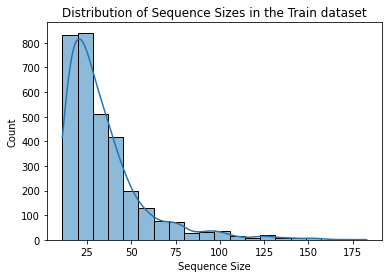

In [38]:
sns.histplot(df_train["SequenceID"].str.len(), bins=20, kde=True);
plt.xlabel("Sequence Size");
plt.title('Distribution of Sequence Sizes in the Train dataset');

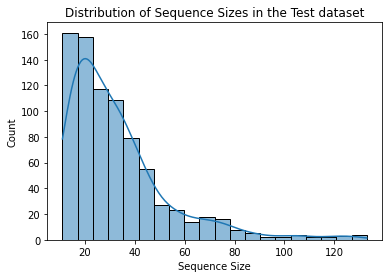

In [39]:
sns.histplot(df_test["SequenceID"].str.len(), bins=20, kde=True);
plt.xlabel("Sequence Size");
plt.title('Distribution of Sequence Sizes in the Test dataset');

In [40]:
train_seq_sizes = df_train["SequenceID"].str.len()
test_seq_sizes = df_test["SequenceID"].str.len()

print(f"Train dataset - mean of sequence sizes: {train_seq_sizes.mean()}")
print(f"Test dataset - mean of sequence sizes: {test_seq_sizes.mean()}")

print(f"Train dataset - smallest sequence size: {train_seq_sizes.min()}")
print(f"Test dataset - smallest sequence size: {test_seq_sizes.min()}")

print(f"Train dataset - largest sequence size: {train_seq_sizes.max()}")
print(f"Test dataset - largest sequence size: {test_seq_sizes.max()}")

Train dataset - mean of sequence sizes: 34.250850603154966
Test dataset - mean of sequence sizes: 33.00988875154512
Train dataset - smallest sequence size: 11
Test dataset - smallest sequence size: 11
Train dataset - largest sequence size: 183
Test dataset - largest sequence size: 133


In [15]:
df_train.sequences.str.count("A")
df_train.sequences.unique()

0       0
1       2
2       8
3       2
4       3
       ..
1373    0
1374    5
1375    0
1376    2
1377    0
Name: sequences, Length: 1378, dtype: int64

array(['RRWWRRWRRW', 'GWKSVFRKAKKVGKTVGGLALDHYLG',
       'ALWKTMLKKLGTMALHAGKAALGAAADTISQGTQ', ...,
       'ESEFDRQEYEECKRQCMQLETSGQMRRCVSQCDKRFEEDIDWSKYDNQE',
       'FISAIASFLGKFL', 'RLSRIVVIRVCR'], dtype=object)

Making sure there are no duplicate proteins.

In [44]:
df_train["SequenceID"].duplicated().sum()
df_test["SequenceID"].duplicated().sum()

0

0